# Versuch 9
## Neutralisierungsenthalpie
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen? Die allgemeinen bereits bekannten und vorausgetzten Python-Kompetenzen könnt ihr unter [Anforderungen.ipynb](Anforderungen.ipynb) nachlesen. Dort sind auch einige Ratschläge bspw. zum Exportieren von Grafiken oder Hinweise zu <code>NumPy</code> aufgeführt.

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Wenn ihr wollt, könnt ihr auch einige für die Auswertung notwendige Naturkonstanten bereits jetzt importieren von <code>scipy.constants</code>. Bedenkt, dass ihr diese Variablennamen nicht erneut nutzen solltet in der Auswertung! 

Es ist sinnvoll, bereits jetzt etwaige Konstanten zu definieren, oder Werte für den studentschen $t$-Faktor einzutragen. Achtet wenn notwendig auf die Einheiten! Sinnvoll wäre beispielsweise die Avogadrokonstante $N_\mathrm{A}$.

In [2]:
from Hilfsdateien.importe_Konstanten import *

## Erster Auswertungsschritt
Wie üblich sollen zunächst die einzelnen Messreihen in mehrdimensionale Arrays eingelesen werden. Es ist sinnvoll, die Messwerte der Kalibrierfunktion in ein Array zu lesen und die übrigen Messungen in ein großes 3D-Array mit $n$ Messreihen und $j$ Messwertepaaren mit $k$ Messgrößen. 

Zunächst lest ihr am besten alle Daten in Arrays ein. Mit welchem Befehl werden üblicherweise Messwerte aus Datensätzen eingelesen, sodass sie als Arrays zur Verfügung stehen?

Wichtig: Da als Dezimaltrennzeichen im Datensatz ein Komma anstatt eines Punktes verwendet wird, müssen wir entweder manuell vorher alle Kommas mit Punkten im Datensatz ersetzen __oder__ Python konvertiert die Kommas in Punkte. Durch eine [Internetrecherche](https://github.com/numpy/numpy/issues/13810#issuecomment-504675321) kann eine einfache Methode zum Umgang mit dem Problem gefunden werden (<code>converters</code> klappt auch mit einem anderen euch bekannten NumPy-Befehl und das Modul <code>io</code> ist _nicht_ notwendig).

In [3]:
calibration_data = np.genfromtxt('data_V8/Kalibrier.txt',converters = {0: lambda s: float(s.decode("UTF-8").replace(",", ".")),1: lambda s: float(s.decode("UTF-8").replace(",", "."))}, skip_header=1)
hcl_naoh = np.genfromtxt('data_V8/HCL_NaOH.txt',converters = {0: lambda s: float(s.decode("UTF-8").replace(",", ".")),1: lambda s: float(s.decode("UTF-8").replace(",", "."))}, skip_header=2, usecols=(0,1))    
hoac_naoh = np.genfromtxt('data_V8/CH3COOH_NaOH.txt',converters = {0: lambda s: float(s.decode("UTF-8").replace(",", ".")),1: lambda s: float(s.decode("UTF-8").replace(",", "."))}, skip_header=2, usecols=(0,1))    
hcl_h2o = np.genfromtxt('data_V8/Verduennung_HCL.txt',converters = {0: lambda s: float(s.decode("UTF-8").replace(",", ".")),1: lambda s: float(s.decode("UTF-8").replace(",", "."))}, skip_header=2, usecols=(0,1))    

Zunächst muss die gemessene Spannung $U$ des Thermoelementes mit der Temperatur $T$ oder der Celsius-Temperatur $\vartheta$ in Beziehung gesetzt werden. Es soll von einem linearen Zusammenhang ausgegangen werden.

Nachdem nun somit die Kalibrierdaten eingelesen sind, soll die lineare Kalibrierfunktion erstellt werden. Wie könnt ihr dies machen?

In [4]:
calibration_fit = linregress(calibration_data[:,0],calibration_data[:,1])

Diese Kalibrierungsfunktion ist nun aufzutragen. Achtet darauf, die Achsenbeschriftung, Legende, Titel, etc. nicht zu vergessen!

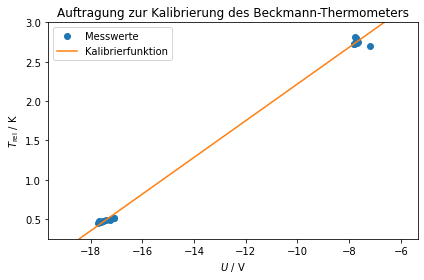

In [5]:
plt.plot(calibration_data[:,0],calibration_data[:,1],'o',label="Messwerte")
#plt.xlim(-18.5,-6.5)
plt.ylim(.25,3.0)
x_range = np.arange(-19,-5)
plt.plot(x_range,calibration_fit.slope*x_range + calibration_fit.intercept ,label="Kalibrierfunktion")
plt.title("Auftragung zur Kalibrierung des Beckmann-Thermometers")
plt.xlabel("$U$ / V")
plt.ylabel("$T_\mathrm{rel}$ / K")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

Für später kann es nützlich sein, bereits eine Funktion zu definieren, welche Spannungen in Temperaturen umrechnet. Diese könnt ihr in „purem“ Python implementieren oder mittels SymPy.

In [6]:
volt = symbols('U')
U2T = calibration_fit.slope*volt + calibration_fit.intercept
U2T = lambdify(volt,U2T,'scipy')

## Zweiter Auswertungsschritt
Nachdem das Beckmann-Thermometer kalibriert ist, muss als nächstes die isobare Wärmekapazität $C_p$ des Kalorimeters bestimmt werden. Diese wird nach der im Praktikumsskript gegebenen Gleichung
\begin{align}
C_p = \frac{U\cdot I\cdot t_\mathrm{Heiz}}{\Delta T}.
\end{align}
aus der Spannung $U$ und der Stromstärke $I$ während einer Heizzeit $t_\mathrm{Heiz}$, die zu einem Temperaturanstieg $\Delta T$ führt, bestimmt. Die entsprechenden Größen können wir nun entweder entweder manuell definieren oder besser das Modul <code>sympy</code> nutzen. Hierzu müssen zu Beginn einige Variablen als „Symbole“ einer Funktion $f(a,b,c,\dots)$ definiert werden. SymPy ermöglicht es uns, bspw. automatisch Ableitungen von dieser Funktion zu bestimmen. Für Details sei auf die Dokumentation verwiesen. Die Ausdrücke können mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt werden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!). An diese können danach die Messwerte übergeben und so $C_p$ berechnet werden.

Implementiert die obige Funktion nun mittels SymPy, sodass die Messwerte direkt an diese übergeben werden können!

In [7]:
volt,dvolt,curr,dcurr,t_heiz,dt_heiz,t_dif,dt_dif = symbols('U dU I dI t_heiz dt_heiz T_diff dT_diff')

C_p = volt*curr*t_heiz/t_dif
dC_p = sqrt((diff(C_p,volt)*dvolt)**2 + (diff(C_p,curr)*dcurr)**2 + (diff(C_p,t_heiz)*dt_heiz)**2 + (diff(C_p,t_dif)*dt_dif)**2)

Cp = lambdify([volt,curr,t_heiz,t_dif],C_p,'scipy')
dCp = lambdify([volt,dvolt,curr,dcurr,t_heiz,dt_heiz,t_dif,dt_dif],dC_p,'scipy')

Nachdem wir nun die Funktion haben, müssen wir die entsprechenden Messgrößen bestimmen.
Hierfür müssen zunächst die gemessenen Spannungen $U$ und die Ströme $I$ der jeweiligen Messung angegeben werden. Es bietet sich an, ein 3D-Array aus $n$ Messungen mit $k$ Wertepaaren und zwei Spalten, einer für $U$ und einer für $I$, zu erstellen.

In [8]:
#Werte sind aus einem Datensatz
#Die hier aufgeführte Form ist aus Sicht des Autors angenehmer einzutippen, als eine Vielzahl an 2er-Listen
#Swapaxes überführt das Array in die in der Auswertung übliche Form

#1 = HCl NaOH
#2 = HOAc NaOH
#3 = HCl H2O
messung_1 = np.array([[12.06,12.09,12.10,12.12,12.13],[1479,1481,1483,1484,1485]]).swapaxes(0,1)
messung_2 = np.array([[12.07,12.10,12.11,12.12,12.14],[1480,1482,1484,1485,1485]]).swapaxes(0,1)
messung_3 = np.array([[12.10,12.13,12.14,12.16,12.17],[1483,1483,1487,1489,1490]]).swapaxes(0,1)
messung = np.array([messung_1,messung_2,messung_3])

In der Auswertung soll jedoch nicht der einzelne Messwert, sondern lieber der Mittelwert $\bar{U}$ bzw. $\bar{I}$ über die fünf Messwerte eingesetzt werden. Als Unsicherheit soll die mit dem Studentschen $t$-Faktor multiplizierte Standardabweichung genommen werden. Idealerweise wird je ein neues Array für $\bar{U}$, dessen Unsicherheit $\Delta \bar{U}$, $\bar{I}$ und $\Delta \bar{I}$ erstellt. Berechnet nun die entsprechenden Werte für alle drei Messreihen.

In [9]:
#Anzahl der Messreihen
n = 3

U_avg = np.empty((n,2))
I_avg = np.empty((n,2))
for i in range(n):
    U_avg[i,0],U_avg[i,1] = np.mean(messung[i,:,0]), student_faktor[3]*np.std(messung[i,:,0])
    I_avg[i,0],I_avg[i,1] = np.mean(messung[i,:,1])/1000, student_faktor[3]*np.std(messung[i,:,1])/1000 

Als nächstes brauchen wir den Temperaturanstieg $\Delta T$. Laut Skript ist hierzu je eine Ausgleichsgerade vor und nach der Heizperiode einzuzeichen. Im Idealfall entspräche das Ergebnis einer Steigung von null und der y-Achsenschittpunkt wäre der Mittelwert, in der Realität sind Abweichungen davon zu erwarten. Zur linearen Regression stehen verschiedene Module zur Auswahl, welches ihr nutzt ist euch überlassen. An die jeweilige Funktion muss natürlich der entsprechende Wertebereich übergeben werden, diesen könnt ihr mit numpy _extrahieren_ oder mittels „purem“ Python erhalten. Ihr könntet beispielsweise ein Array mit den Ober- und Untergrenzen jeweils für die obere und für die untere Ausgleichsgerade für die einzelnen Funktionen definieren oder als eine Variable bei jeder Messung konstant halten. Zur weiteren Auswertung sollten die einzelnen Fittingvariablen in einem mehrdimensionalen Array gespeichert werden.

Ihr werdet im weiteren Verlauf der Auswertung noch sehr viele Ausgleichsgeraden über eine Vor- und Nachlaufzeit ziehen müssen. Um syntaxeffizient zu arbeiten, solltet ihr eine Funktion implementieren, die Folgendes macht: Mittels eines NumPy-Befehls soll der Bereich der Vor- und Nachlaufzeit _extrahiert_ werden, eine lineare Regression jeweils über die Vor- und Nachlaufzeit durchgeführt werden und die Koeffizienten der beiden Ausgleichsgeraden zurückgegeben werden. Diese könnt ihr dann jedesmal aufrufen, wenn ihr je eine Ausgleichsgerade für eine Vor- und Nachlaufzeit benötigt.

In [10]:
def pre_post_line(x_data,y_data,pre_t_start,pre_t_end,post_t_start,post_t_end):
    x_pre = np.extract((x_data >= pre_t_start) & (x_data <= pre_t_end),x_data)
    y_pre = np.extract((x_data >= pre_t_start) & (x_data <= pre_t_end),y_data)
    x_post = np.extract((x_data >= post_t_start) & (x_data <= post_t_end),x_data)
    y_post = np.extract((x_data >= post_t_start) & (x_data <= post_t_end),y_data)
    
    pre_fit = linregress(x_pre,y_pre)
    post_fit = linregress(x_post,y_post)
    
    return np.array([[pre_fit.slope,pre_fit.intercept],[post_fit.slope,post_fit.intercept]])

Als nächstes muss die mittlere Temperatur und der Temperaturanstieg $\Delta T$ ermittelt werden. Hierzu werden die bestimmten Ausgleichsgeraden genutzt. Diese bilden mit den Messwerten je zwei Flächen, eine ober- und eine unterhalb der Kurve. Hierzu wird mit <code>cumtrapz</code> aus <code>scipy.integrate</code> das kumulierte Integral nach der [Trapezregel](https://www.spektrum.de/lexikon/mathematik/numerische-integration/9304) für beide Flächen bestimmt. Die Position, an der der Betrag der Differenz beider Flächen minimal ist, soll die Temperatur sein. An dieser Position wird auch der Temperaturanstieg $\Delta T$ abgelesen.

Es empfiehlt sich, zunächst die Flächen einzeln zu bestimmen, dann die Differenz zwischen beiden Flächen an der jeweiligen Stelle zu bestimmen (Reihenfolge der Einträge in den Arrays beachten!) und das Minimum des Betrags der Differenz zu suchen. Bei der Bestimmung der Integrale muss für ein Integral die Reihenfolge der Einträge in den Arrays mit den x- und y-Werten invertiert werden. Als Beispiel soll eine S-Kurve mit $t$ zwischen 200 und 600&nbsp;s angenommen werden mit einer mittleren Temperatur bei 400&nbsp;s. Das Integral für die untere Fläche sei bei kleinen $t$ deutlich kleiner als die obere Fläche. Wird _ohne_ Invertierung das Integral zwischen 200 und 600&nbsp;s berechnet, steigen beide Integrale mit steigendem $t$ an, für eine plausible Bestimmung der mittleren Temperatur müsste jedoch eines der beiden Integrale mit steigendem $t$ abnehmen. Dies wird durch die Invertierung der x- und y-Werte für eines der beiden Integrale sichergestellt! Das Ergebnis sollte grafisch auf Plausibilität kontrolliert werden.

Analog zu den Augleichsgeraden schreibt ihr nun eine Funktion, die Obiges erledigt.

_Für Fortgeschrittene:_ Zum Glätten kann aus <code>scipy.signal</code> eine Funktion für einen [Savitzky-Golay-Filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) importiert werden. Bei diesem werden über ein bestimmtes Intervall Polynome mit der Ordnung $\zeta$ gefittet, die Position von Extremstellen und Wendepunkten bleibt dabei aber unverändert. _Die Originaldaten müssen natürlich weiterhin in der Auftragung gezeigt werden!_


In [11]:
from scipy.signal import savgol_filter
def medium_T(x_data,y_data,lower_limit,upper_limit,curves):#
    lower_curve = curves[0]
    upper_curve = curves[1]
    #Savgol-Filter, NICHT von Studenten verlangt
    #Man erhält eine schönere mittlere Temperatur und der Einfluss des Rauschens wird etwas rausgemittelt
    #Das Rauschen würde von den Studenten durch eine höhere Unsicherheit von Delta T berücksichtigt werden
    y_smooth = savgol_filter(y_data,window_length=13,polyorder=3)
    y_data = y_smooth
    #Funktioniert auch, wenn man die obigen beiden Zeilen auskommentiert
    x_region = np.extract((x_data > lower_limit) & (x_data < upper_limit),x_data)
    y_region = np.extract((x_data > lower_limit) & (x_data < upper_limit),y_data)
    
    flaeche_unten = cumtrapz(y_region - (lower_curve[0]*x_region + lower_curve[1]),x=x_region)
    #WICHTIGER TIPP 
    #Array[::-1] invertiert das Array sehr rechenzeit-effizient!
    flaeche_oben = cumtrapz(-y_region[::-1] + (upper_curve[0]*x_region[::-1] + upper_curve[1]),x=x_region[::-1])
    
    #WEITERER WICHTIGER TIPP
    #Damit die Integrale auch bei den gleichen Zeiten verglichen werden
    #muss ERNEUT ein Array invertiert werden!
    min_diff = np.amin(np.abs(flaeche_oben[::-1]+flaeche_unten))
    min_diff_pos = np.argmin(np.abs(flaeche_oben[::-1]+flaeche_unten))
      
    T_mid_y = y_region[min_diff_pos]
    T_mid_x = x_region[min_diff_pos]
    T_difference = (upper_curve[0]*x_region[min_diff_pos] + upper_curve[1]) - (lower_curve[0]*x_region[min_diff_pos] + lower_curve[1])
    return T_difference
    

Nachfolgend plottet ihr am besten den Datensatz, um die Ergebnisse eurer Funktionen zu überprüfen. Die Grafik könnt ihr vollständig beschriftet (Achsenbeschriftung, Titel, Legende, etc.) auch in euer Protokoll einfügen.

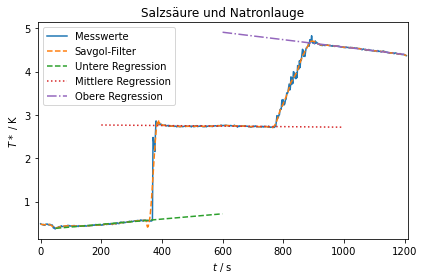

In [12]:
kurven = np.empty((3,2,2))
kurven2 = np.empty((3,2,2))

T_diff_el = np.empty(3)
T_diff_verd = np.empty(3)
kurven[0] = pre_post_line(hcl_naoh[:,0]/1000,U2T(hcl_naoh[:,1]),100,355,380,700)
kurven2[0] = pre_post_line(hcl_naoh[:,0]/1000,U2T(hcl_naoh[:,1]),380,700,900,1200)
T_diff_verd[0] = medium_T(hcl_naoh[:,0]/1000,U2T(hcl_naoh[:,1]),355,380,kurven[0])
T_diff_el[0] = medium_T(hcl_naoh[:,0]/1000,U2T(hcl_naoh[:,1]),700,1000,kurven2[0])
plt.plot(hcl_naoh[:,0]/1000,U2T(hcl_naoh[:,1]),'-',label="Messwerte")
plt.plot(hcl_naoh[:,0]/1000,savgol_filter(U2T(hcl_naoh[:,1]),window_length=21,polyorder=3),'--',label="Savgol-Filter")
plt.plot(np.arange(50,600),np.arange(50,600)*kurven[0,0,0]+kurven[0,0,1],'--',label="Untere Regression")
plt.plot(np.arange(200,1000),np.arange(200,1000)*kurven[0,1,0]+kurven[0,1,1],':',label="Mittlere Regression")
plt.plot(np.arange(600,1200),np.arange(600,1200)*kurven2[0,1,0]+kurven2[0,1,1],'-.',label="Obere Regression")
#plt.plot(T_x2,T_y2,'o',color="tab:red")
plt.legend()
plt.xlim(-10,1210)
plt.title("Salzsäure und Natronlauge")
plt.xlabel("$t$ / s")
plt.ylabel("$T*$ / K" )
plt.tight_layout()
plt.show()
#plt.savefig('test.pdf',dpi=2400)
plt.close()

Um uns erneut Arbeit in den weiteren Auswertungsschritten zu erleichtern, sollten wir nun auch für Essigsäure und Natronlauge, sowie Salzsäure und Wasser die Ausgleichsgeraden bestimmen.

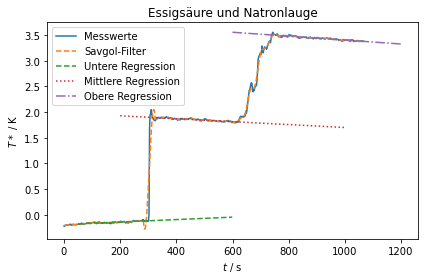

In [13]:
kurven[1] = pre_post_line(hoac_naoh[:,0]/1000,U2T(hoac_naoh[:,1]),100,290,380,600)
kurven2[1] = pre_post_line(hoac_naoh[:,0]/1000,U2T(hoac_naoh[:,1]),380,600,850,1200)
T_diff_verd[1] = medium_T(hoac_naoh[:,0]/1000,U2T(hoac_naoh[:,1]),290,380,kurven[1])
T_diff_el[1] = medium_T(hoac_naoh[:,0]/1000,U2T(hoac_naoh[:,1]),600,850,kurven2[1])
plt.plot(hoac_naoh[:,0]/1000,U2T(hoac_naoh[:,1]),'-',label="Messwerte")
plt.plot(hoac_naoh[:,0]/1000,savgol_filter(U2T(hoac_naoh[:,1]),window_length=21,polyorder=3),'--',label="Savgol-Filter")
plt.plot(np.arange(50,600),np.arange(50,600)*kurven[1,0,0]+kurven[1,0,1],'--',label="Untere Regression")
plt.plot(np.arange(200,1000),np.arange(200,1000)*kurven[1,1,0]+kurven[1,1,1],':',label="Mittlere Regression")
plt.plot(np.arange(600,1200),np.arange(600,1200)*kurven2[1,1,0]+kurven2[1,1,1],'-.',label="Obere Regression")
#plt.plot(T_x2,T_y2,'o',color="tab:red")
plt.legend()
plt.title("Essigsäure und Natronlauge")
plt.xlabel("$t$ / s")
plt.ylabel("$T*$ / K" )
plt.tight_layout()
plt.show()
#plt.savefig('test.pdf',dpi=2400)
plt.close()

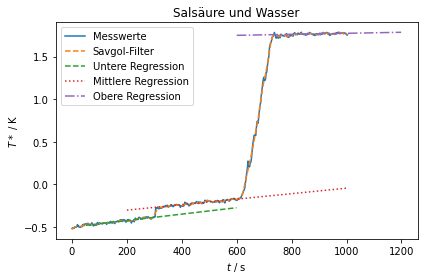

In [14]:
kurven[2] = pre_post_line(hcl_h2o[:,0]/1000,U2T(hcl_h2o[:,1]),100,250,400,550)
kurven2[2] = pre_post_line(hcl_h2o[:,0]/1000,U2T(hcl_h2o[:,1]),400,550,800,1000)
T_diff_verd[2] = medium_T(hcl_h2o[:,0]/1000,U2T(hcl_h2o[:,1]),250,400,kurven[2])
T_diff_el[2] = medium_T(hcl_h2o[:,0]/1000,U2T(hcl_h2o[:,1]),550,800,kurven2[2])
plt.plot(hcl_h2o[:,0]/1000,U2T(hcl_h2o[:,1]),'-',label="Messwerte")
plt.plot(hcl_h2o[:,0]/1000,savgol_filter(U2T(hcl_h2o[:,1]),window_length=21,polyorder=3),'--',label="Savgol-Filter")
plt.plot(np.arange(50,600),np.arange(50,600)*kurven[2,0,0]+kurven[2,0,1],'--',label="Untere Regression")
plt.plot(np.arange(200,1000),np.arange(200,1000)*kurven[2,1,0]+kurven[2,1,1],':',label="Mittlere Regression")
plt.plot(np.arange(600,1200),np.arange(600,1200)*kurven2[2,1,0]+kurven2[2,1,1],'-.',label="Obere Regression")
#plt.plot(T_x2,T_y2,'o',color="tab:red")
plt.legend()
#plt.ylim(-.5,-.2)
plt.title("Salsäure und Wasser")
plt.xlabel("$t$ / s")
plt.ylabel("$T*$ / K" )
plt.tight_layout()
plt.show()
#plt.savefig('test.pdf',dpi=2400)
plt.close()

Nach diesem großen Programmieraufwand haben wir alle Daten, um $C_p$ zu bestimmen. Die entsprechenden Werte können somit in die zu Beginn definierte Funktion für $C_p$ und $\Delta C_p$ eingesetzt werden.

In [15]:
C_p_arr = np.empty((3,2))
for i in range(3):
    C_p_arr[i,0],C_p_arr[i,1] = Cp(U_avg[i,0],I_avg[i,0],100,T_diff_el[i]),dCp(U_avg[i,0],U_avg[i,1],I_avg[i,0],I_avg[i,1],100,1,T_diff_el[i],0.05)
print("Wärmekapazität")
for i,system in enumerate(["HCl + NaOH","HOAc + NaOH","HCl + H2O"]):
    print(system)
    print(np.array2string(C_p_arr[i]/1000,separator=" ± ") + " kJ/K")

Wärmekapazität
HCl + NaOH
[0.902 ± 0.025] kJ/K
HOAc + NaOH
[1.037 ± 0.032] kJ/K
HCl + H2O
[0.948 ± 0.028] kJ/K


## Dritter Auswertungsschritt
Uns interessieren die Ergebnisse als eine molare Größe, weshalb als Nächstes die Stoffmenge der verbrauchten Säure zu ermitteln ist. Diese könnt ihr aus der Massendifferenz $\Delta m$, der Dichte $\rho$ und der Konzentration $c$ erhalten.

In [16]:
# Aufbau HCl/NaOH, HOAc/NaOH,HCl/H2O
prae = np.array([144.0544,140.2260,142.6537])
post = np.array([123.6863,120.1982,122.4112])
verbrauch = prae-post

konzentration = 2.0e-3 #mol/cm³
#Dichten, Werte von Studenten anzugeben
rho = np.array([1.03,1.0152,1.03])
delta_m = np.sqrt(2)*0.05e-3 #mg, angenommen

#Kann man mit SymPy lösen, muss man aber wie hier nicht
n_verbrauch = verbrauch*konzentration/rho
dn_verbrauch = delta_m*konzentration/rho
for i in range(len(n_verbrauch)):
    print(np.array2string(np.array([n_verbrauch[i],dn_verbrauch[i]]),separator= " ± "))

[3.955e-02 ± 1.373e-07]
[3.946e-02 ± 1.393e-07]
[3.931e-02 ± 1.373e-07]


## Vierter, fünfter, sechster und siebter Auswertungsschritt
Die Verdünnungs- und Neutralisationsenthalpien können nach der im Praktikumsskript aufgeführten Gleichung
\begin{align}
 Q = C_{p,m}\cdot \Delta T_\mathrm{reakt}
\end{align}
aus der molaren isobaren Wärmekapazität $C_{p,m}$ und dem Temperaturanstieg $\Delta T_\mathrm{reakt}$ durch den Prozess bestimmt werden. Die Unsicherheit ist durch Gauß’sche Fehlerfortpflanzung zu bestimmen. Da wir alle Größen schon haben, müssen wir nur noch mit SymPy eine Funktion für $Q$ und $\Delta Q$ erstellen und die Werte einsetzen. Dies ist nun eure Aufgabe (sind alle Enthalpien voneinander unabhängig?)!

In [17]:
capac,dcapac,n_menge,dn_menge = symbols('C_pm dC_pm n dn_menge')
Q = capac/n_menge*t_dif
dQ = sqrt((diff(Q,capac)*dcapac)**2 + (diff(Q,t_dif)*dt_dif)**2 + (diff(Q,n_menge)*dn_menge)**2)

Q = lambdify([capac,n_menge,t_dif],Q,'scipy')
dQ = lambdify([capac,dcapac,n_menge,dn_menge,t_dif,dt_dif],dQ,'scipy')
print(T_diff_verd)
enthalpien = np.empty((3,2))
for i in range(3):
    enthalpien[i,0],enthalpien[i,1] = Q(C_p_arr[i,0],n_verbrauch[i],T_diff_verd[i]), dQ(C_p_arr[i,0],C_p_arr[i,1],n_verbrauch[i],dn_verbrauch[i],T_diff_verd[i],0.05)

#Verdünnungsenthalpie bei HCl/NaOH abzuziehen, starke Säure und so...
enthalpien[0,0] = enthalpien[0,0] - enthalpien[2,0]
enthalpien[0,1] = np.sqrt(enthalpien[0,1]**2 + enthalpien[2,1]**2)
print("Wärmen (Vorzeichen für Enthalpien zu invertieren)")

for i,system in enumerate(["HCl + NaOH","HOAc + NaOH","HCl + H2O"]):
    print(system)
    print(np.array2string(enthalpien[i],separator=" ± ") + " kJ/mol")


[2.179 2.015 0.117]
Wärmen (Vorzeichen für Enthalpien zu invertieren)
HCl + NaOH
[46893.273 ±  2164.962] kJ/mol
HOAc + NaOH
[52927.69  ±  2110.604] kJ/mol
HCl + H2O
[2809.986 ± 1208.298] kJ/mol


## Achter Auswertungsschritt
Nun ist es eure Aufgabe, mittels des Satz von Hess die Enthalpien zu bestimmen. Sucht euch Literaturwerte und berechnet die entsprechenden Größen!

In [18]:
H_f_h2o = -285.83 #kJ/mol
H_f_prot = 0 #kJ/mol
H_f_oh = -229.99 #kJ/mol
H_f_oac = -486.01
H_f_hoac = -484.5

H_r_hcl = H_f_h2o - (H_f_prot + H_f_oh)
#Round ist nicht notwendig
print(round(H_r_hcl,4))
H_r_hoac = H_f_h2o + H_f_oac - (H_f_oh + H_f_hoac)
print(round(H_r_hoac,4))



-55.84
-57.35


---
Arved Dorst, Göttingen, __2021__.